In [259]:
%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
from scipy.io import loadmat
from scipy.optimize import minimize
import seaborn as sns
import warnings

import bhv_analysis as bhv
import bhv_model as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=matplotlib.cbook.mplDeprecation)

In [4]:
master = bhv.loadData().sort_values(by=['date','trial'])

In [5]:
master

,date,sesstype,trial,block,trialtype,dimension,left_prob_level,right_prob_level,left_delay_level,right_delay_level,...,set,lever,rt,if_reward,pos_of_stim1,left_fit_value,right_fit_value,w1,w2,w3
14976,2019-08-01,B,1.0,1.0,2.0,1.0,2.0,1.0,4.0,4.0,...,1.0,1.0,480.998598,1.0,1.0,-0.411013,0.794494,1.205506,-2.101645,0.621186
14977,2019-08-01,B,2.0,1.0,2.0,1.0,1.0,3.0,4.0,4.0,...,1.0,1.0,781.913680,NaN,-1.0,1.794494,-1.616519,1.205506,-2.101645,0.621186
14978,2019-08-01,B,3.0,1.0,1.0,1.0,NaN,1.0,NaN,4.0,...,1.0,1.0,465.941958,1.0,1.0,NaN,1.794494,1.205506,-2.101645,0.621186
14979,2019-08-01,B,4.0,1.0,1.0,1.0,NaN,3.0,NaN,4.0,...,1.0,1.0,452.059234,NaN,1.0,NaN,-0.616519,1.205506,-2.101645,0.621186
14980,2019-08-01,B,5.0,1.0,2.0,1.0,3.0,3.0,4.0,4.0,...,1.0,-1.0,1108.995379,NaN,1.0,-2.616519,-1.616519,1.205506,-2.101645,0.621186
14981,2019-08-01,B,6.0,1.0,1.0,1.0,2.0,NaN,4.0,NaN,...,1.0,-1.0,475.908996,NaN,-1.0,0.588987,NaN,1.205506,-2.101645,0.621186
14982,2019-08-01,B,7.0,1.0,2.0,1.0,3.0,2.0,4.0,4.0,...,1.0,1.0,481.452442,NaN,1.0,-2.616519,-1.411013,1.205506,-2.101645,0.621186
14983,2019-08-01,B,8.0,1.0,2.0,1.0,3.0,2.0,4.0,4.0,...,1.0,1.0,485.438556,1.0,1.0,-0.616519,0.588987,1.205506,-2.101645,0.621186
14984,2019-08-01,B,9.0,1.0,2.0,1.0,3.0,3.0,4.0,4.0,...,1.0,-1.0,678.779992,NaN,1.0,-2.616519,-0.616519,1.205506,-2.101645,0.621186
14985,2019-08-01,B,10.0,1.0,2.0,1.0,2.0,1.0,4.0,4.0,...,1.0,1.0,471.664252,1.0,1.0,-0.411013,0.794494,1.205506,-2.101645,0.621186


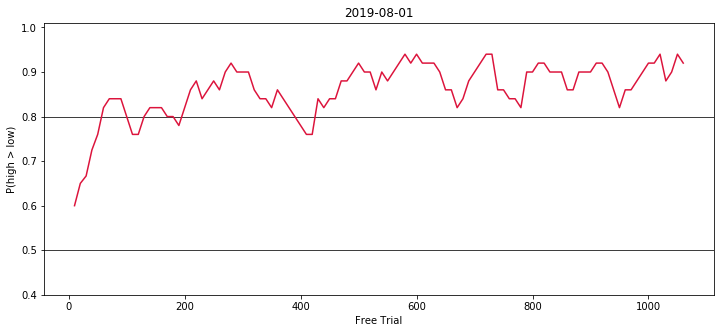

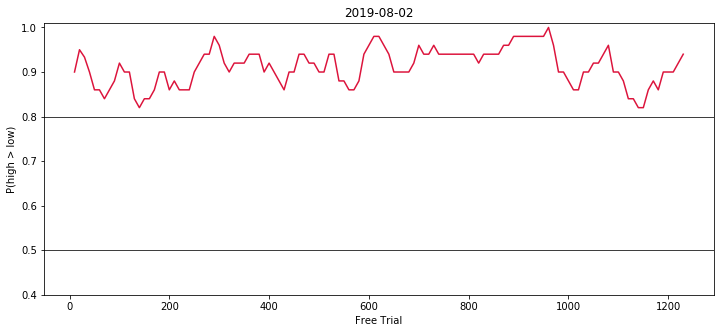

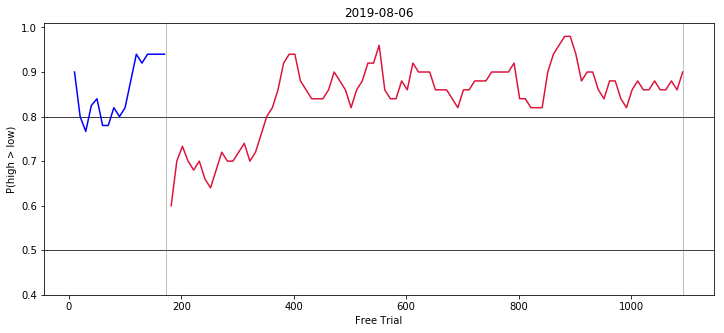

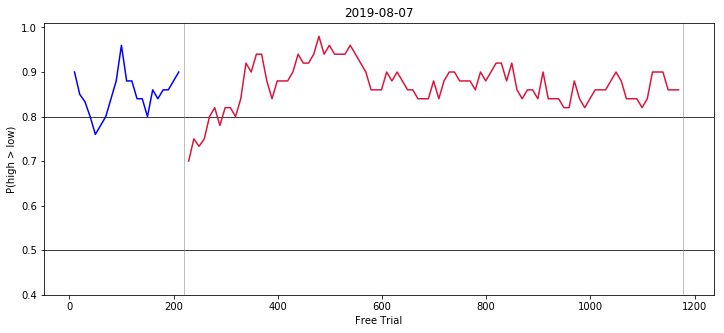

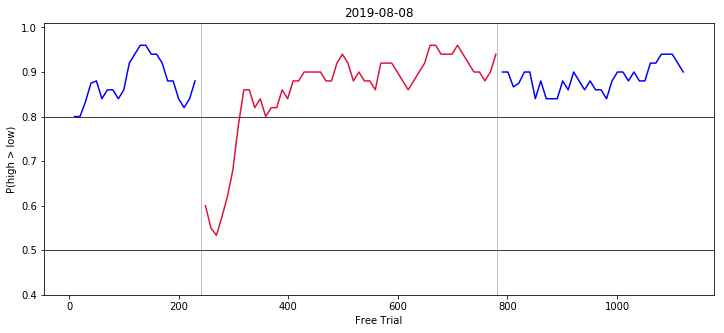

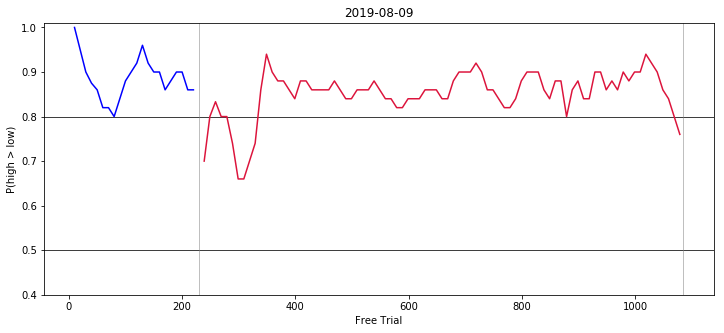

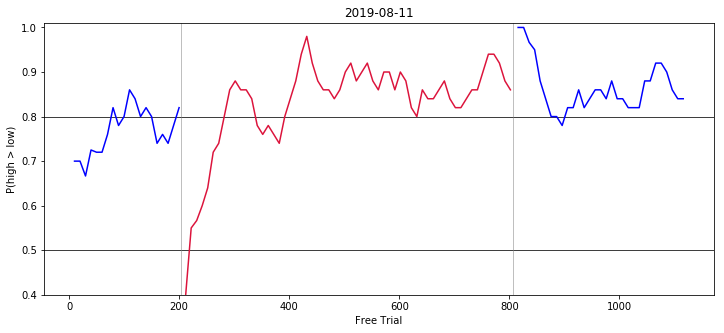

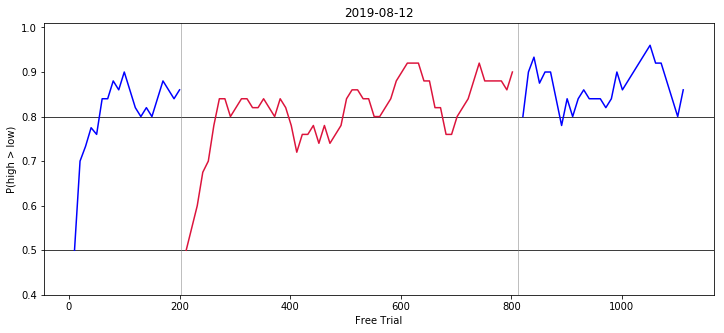

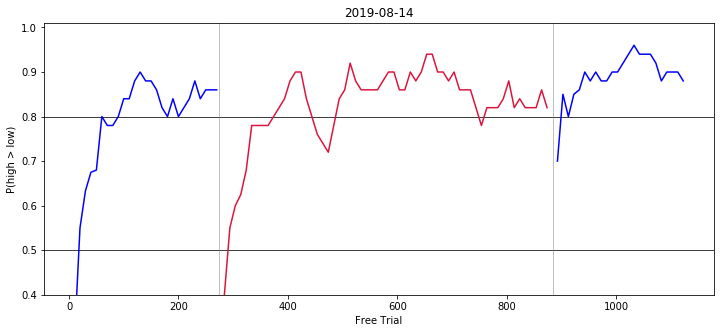

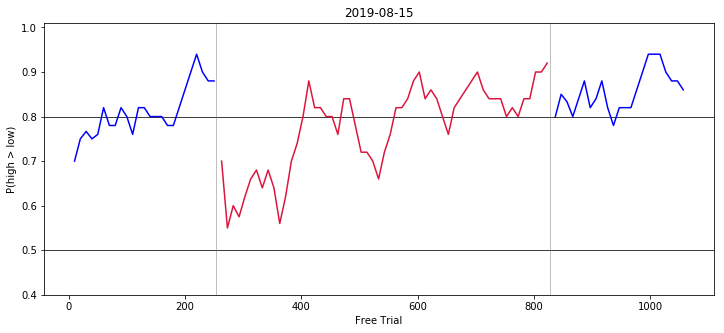

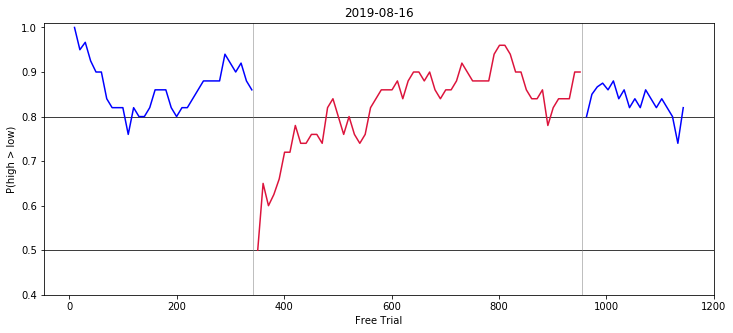

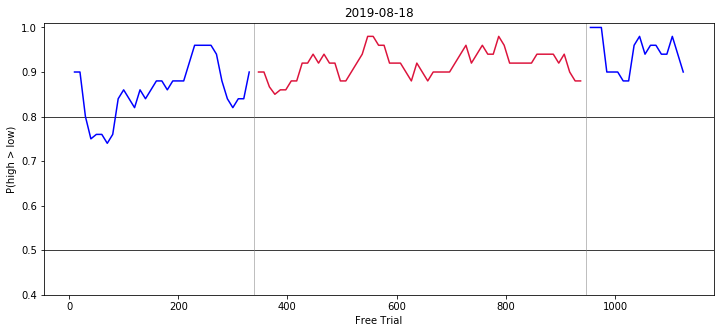

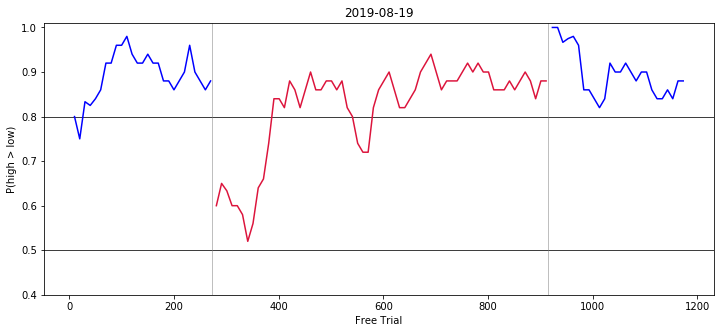

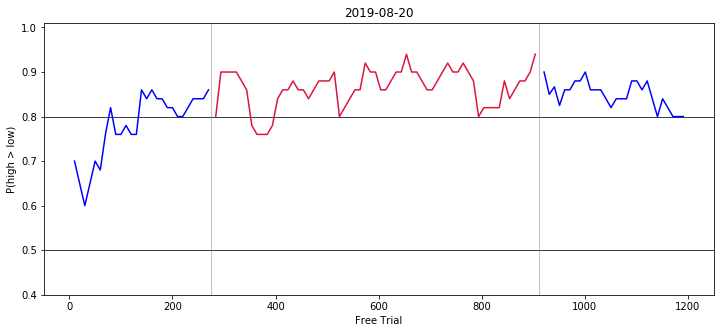

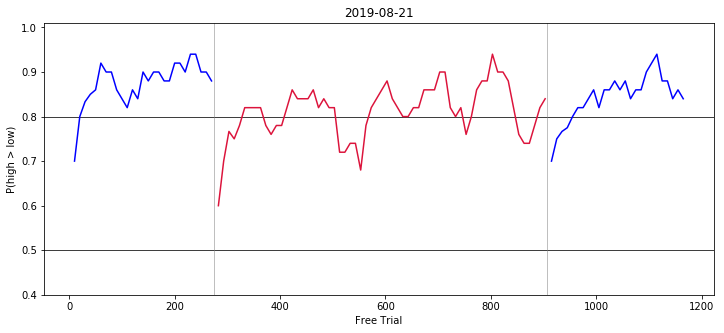

In [13]:
# Plot early sessions
for date in master['date'].unique()[:15]:
    bhv.plotSession(master,date,win_size=50,min_trials=10,win_step=10)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 864x360 with 0 Axes>

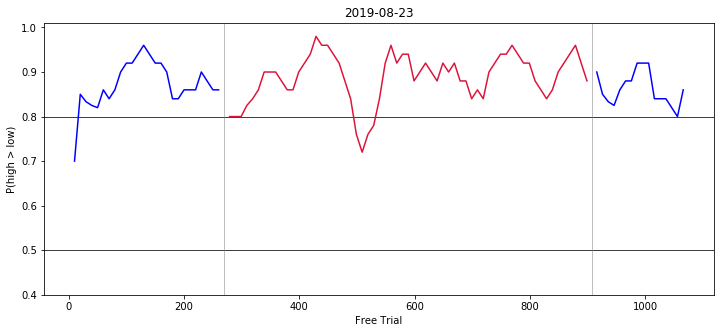

<Figure size 864x360 with 0 Axes>

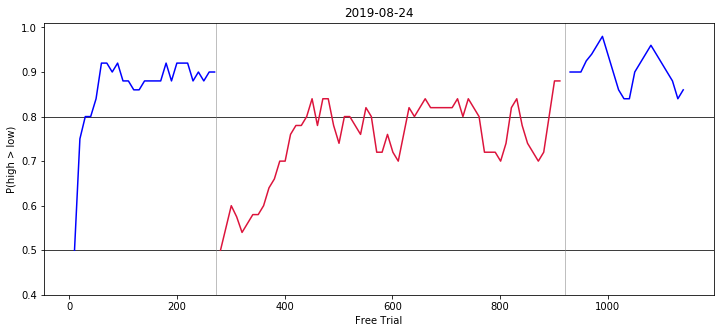

<Figure size 864x360 with 0 Axes>

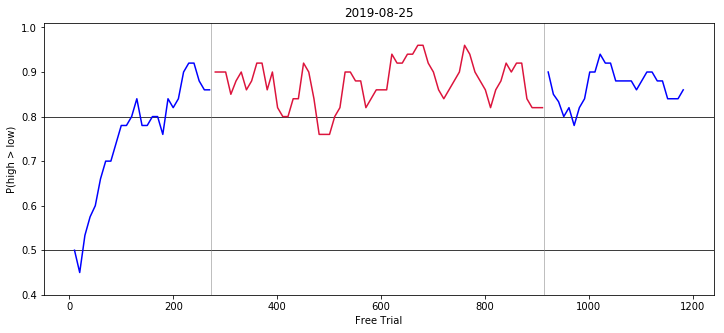

<Figure size 864x360 with 0 Axes>

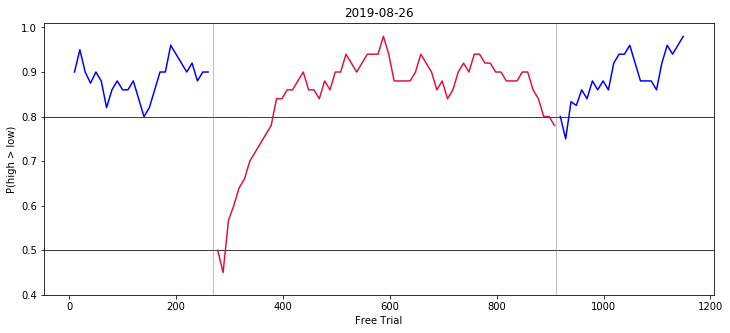

<Figure size 864x360 with 0 Axes>

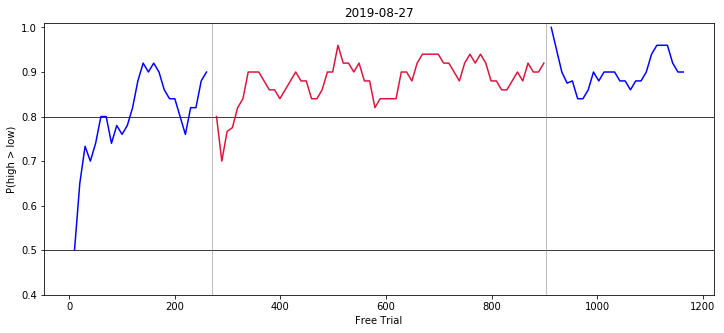

<Figure size 864x360 with 0 Axes>

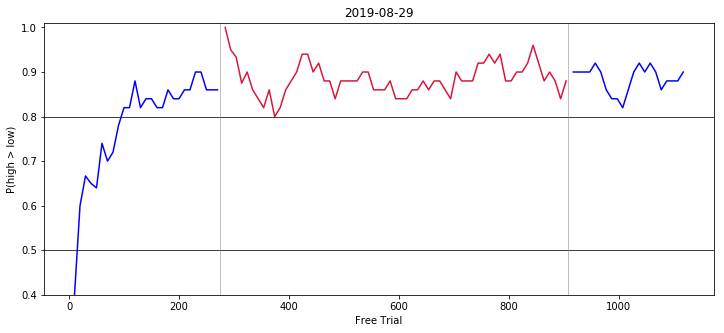

<Figure size 864x360 with 0 Axes>

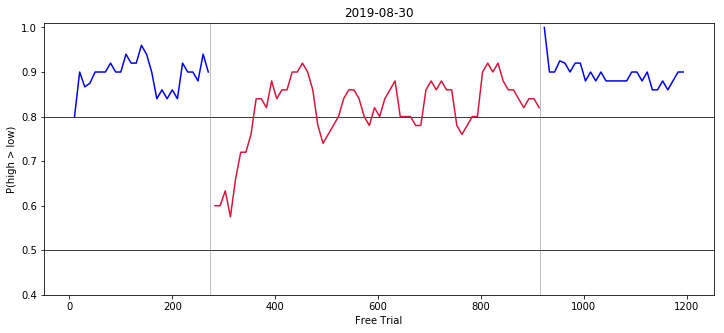

<Figure size 864x360 with 0 Axes>

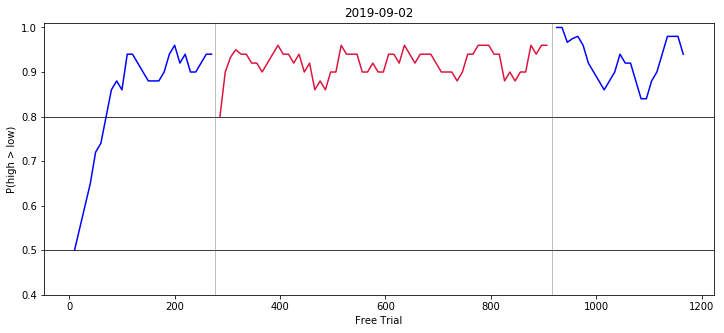

<Figure size 864x360 with 0 Axes>

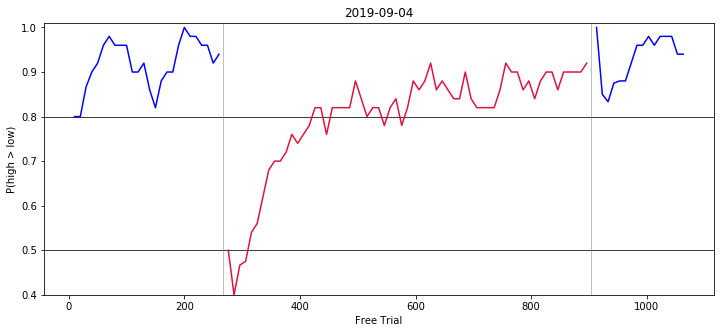

<Figure size 864x360 with 0 Axes>

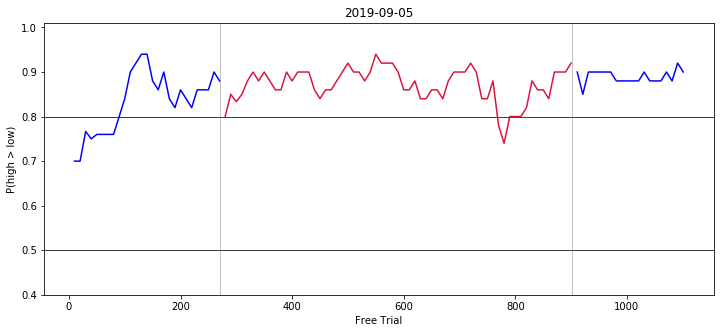

<Figure size 864x360 with 0 Axes>

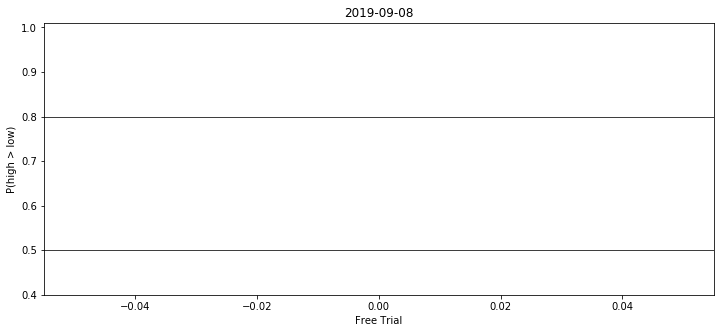

<Figure size 864x360 with 0 Axes>

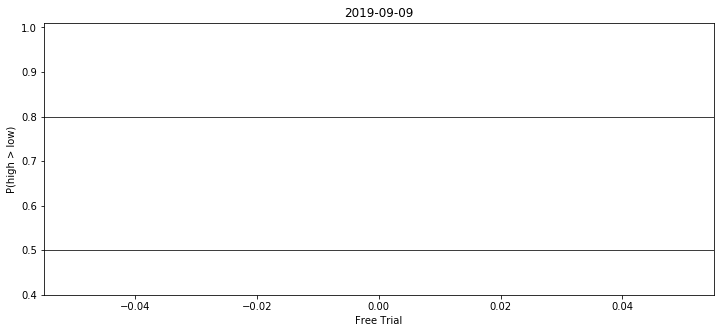

<Figure size 864x360 with 0 Axes>

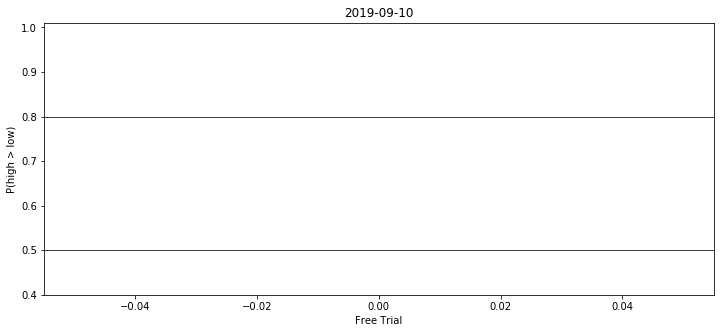

<Figure size 864x360 with 0 Axes>

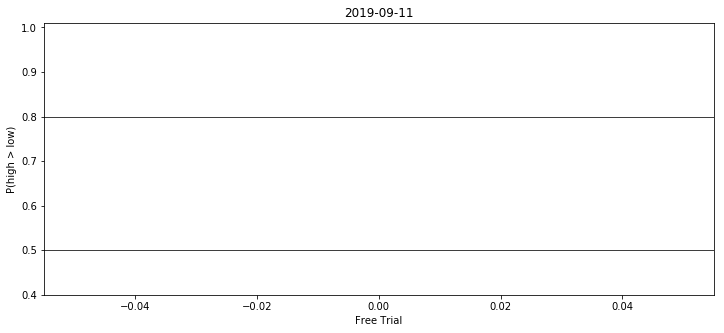

<Figure size 864x360 with 0 Axes>

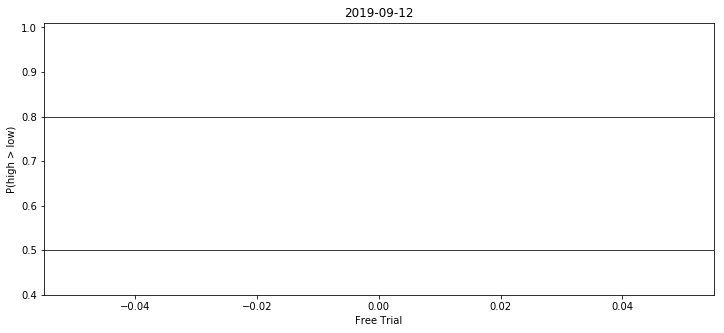

<Figure size 864x360 with 0 Axes>

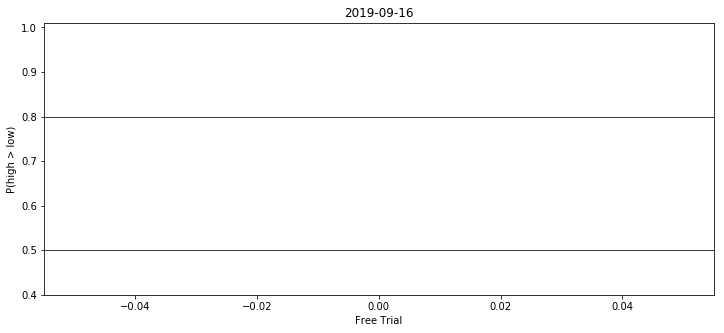

<Figure size 864x360 with 0 Axes>

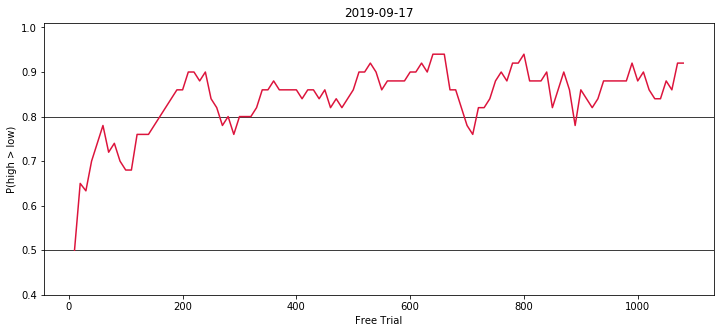

<Figure size 864x360 with 0 Axes>

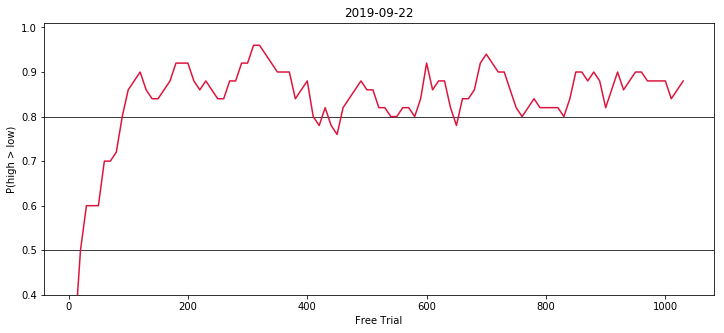

<Figure size 864x360 with 0 Axes>

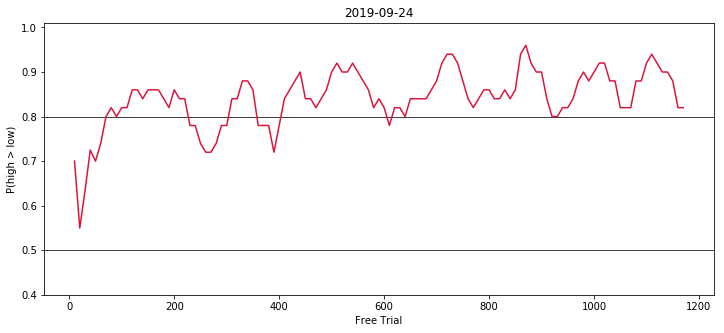

In [15]:
# Plot middle sessions
for date in master['date'].unique()[15:-15]:
    plt.figure(figsize=(12,5))
    bhv.plotSession(master,date,win_size=50,min_trials=10,win_step=10)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 864x360 with 0 Axes>

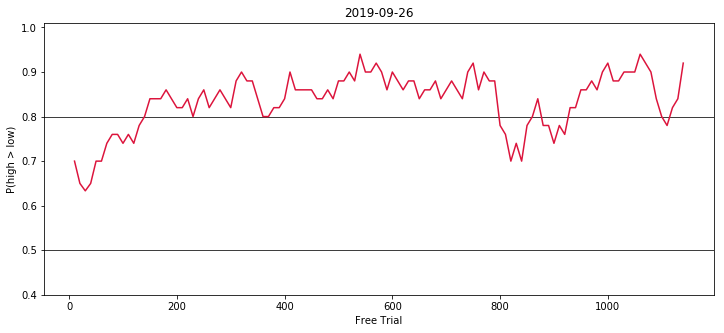

<Figure size 864x360 with 0 Axes>

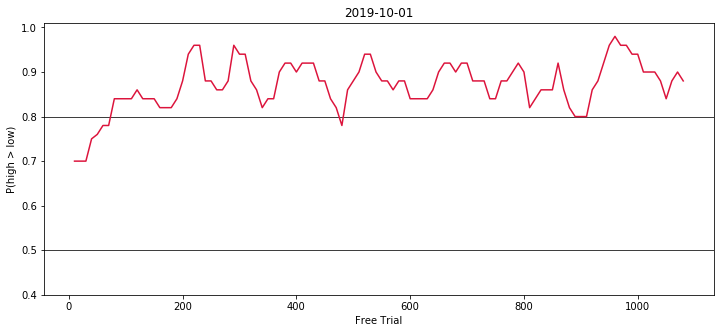

<Figure size 864x360 with 0 Axes>

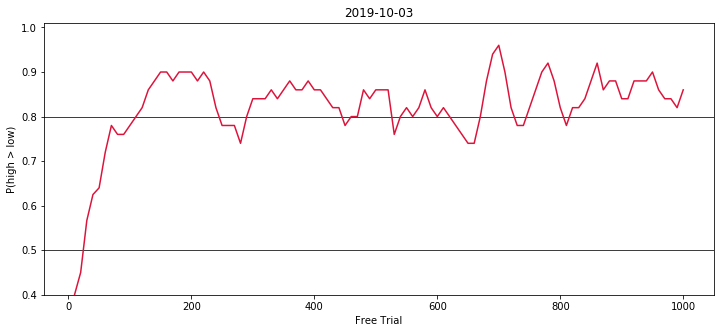

<Figure size 864x360 with 0 Axes>

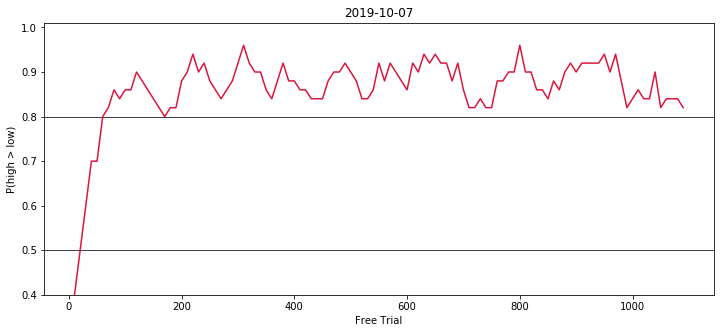

<Figure size 864x360 with 0 Axes>

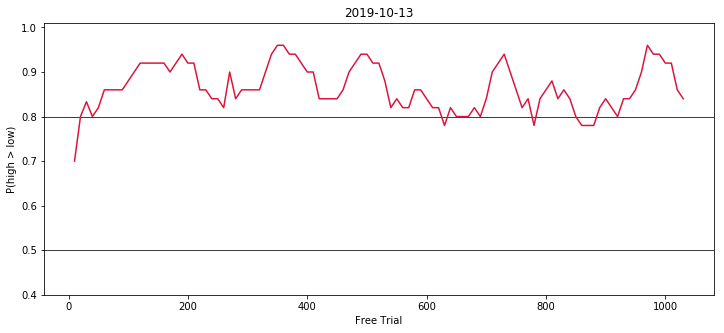

<Figure size 864x360 with 0 Axes>

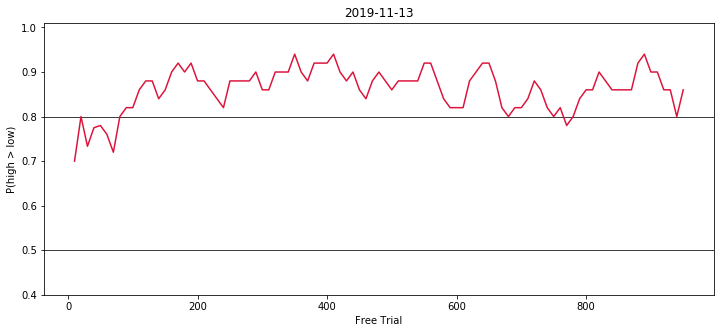

<Figure size 864x360 with 0 Axes>

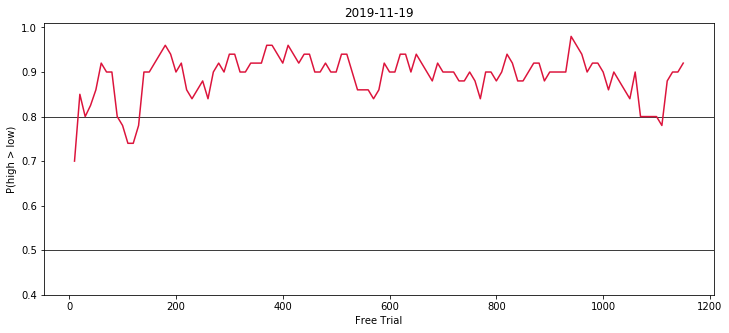

<Figure size 864x360 with 0 Axes>

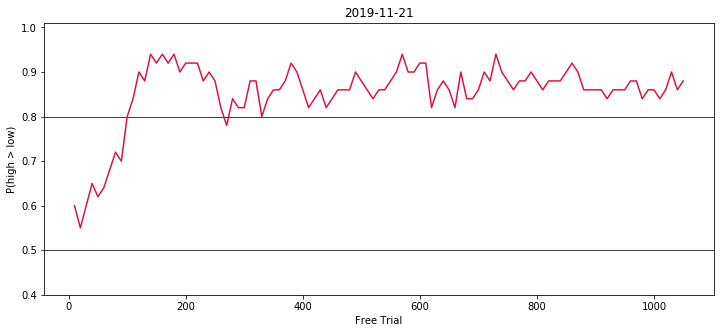

<Figure size 864x360 with 0 Axes>

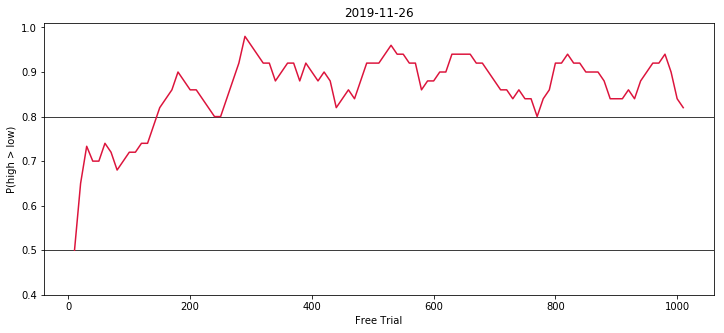

<Figure size 864x360 with 0 Axes>

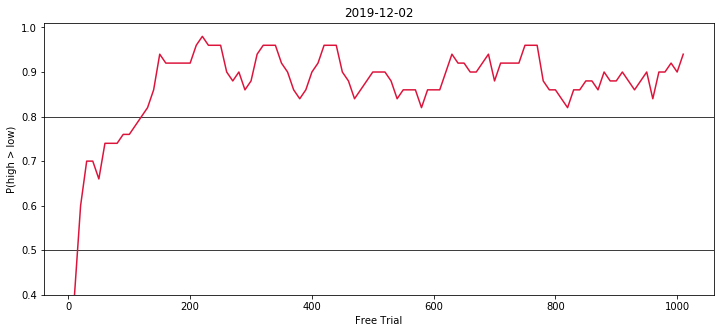

<Figure size 864x360 with 0 Axes>

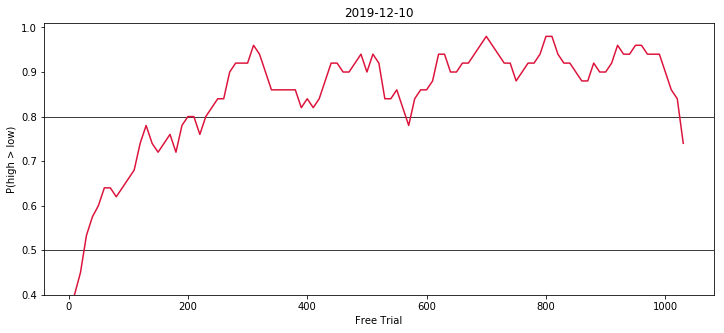

<Figure size 864x360 with 0 Axes>

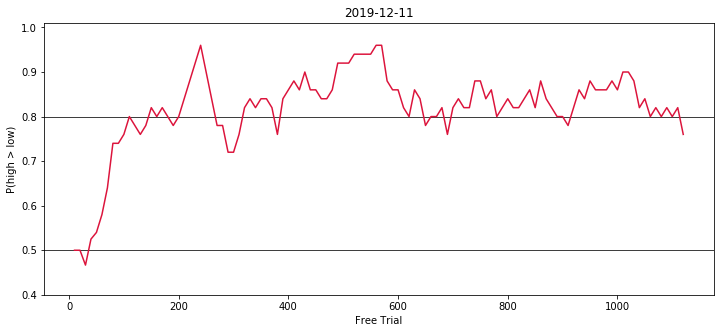

<Figure size 864x360 with 0 Axes>

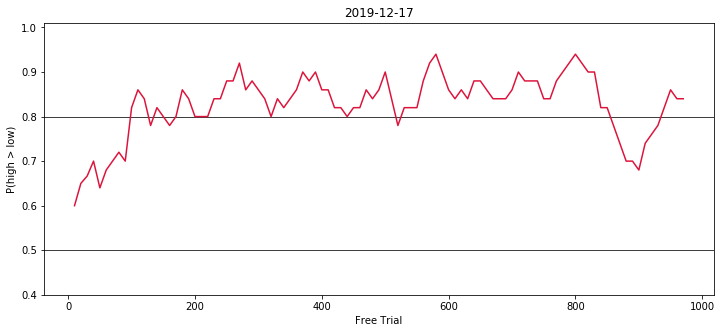

<Figure size 864x360 with 0 Axes>

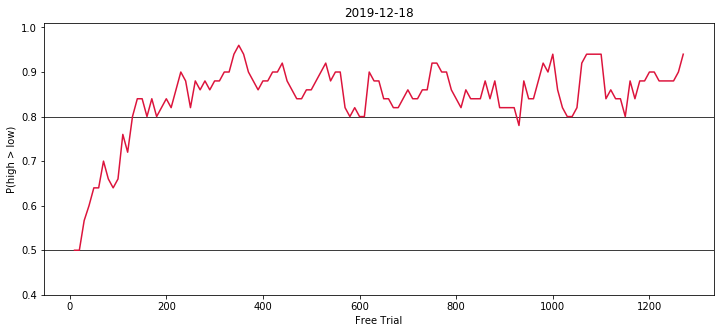

<Figure size 864x360 with 0 Axes>

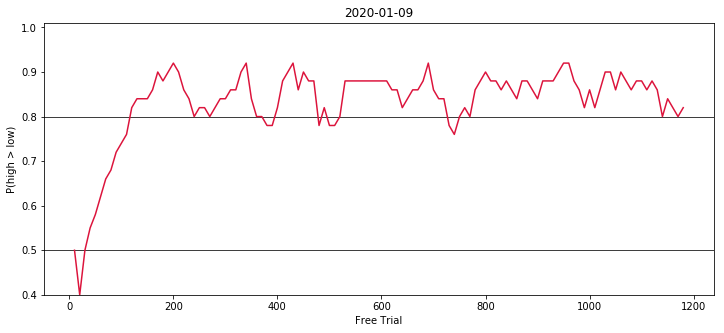

In [17]:
# Plot late sessions
for date in master['date'].unique()[-15:]:
    plt.figure(figsize=(12,5))
    bhv.plotSession(master,date,win_size=50,min_trials=10,win_step=10)

/Users/nate/Desktop/Rotations/Wallis/behav_analyzer.py:169: RuntimeWarning: invalid value encountered in true_divide
  conf_mat = np.round(np.divide(conf_mat,n),2)


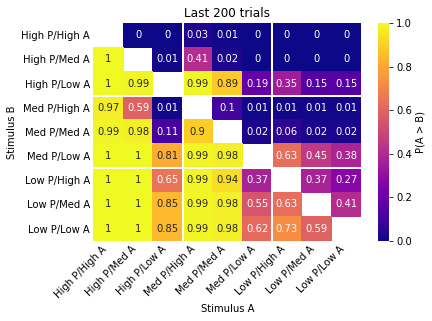

In [24]:
_ = bhv.plotConfusions(master, compare='ab')

/Users/nate/Desktop/Rotations/Wallis/bhv_analysis.py:193: RuntimeWarning: invalid value encountered in true_divide
  if compare in ['ab','lr']:


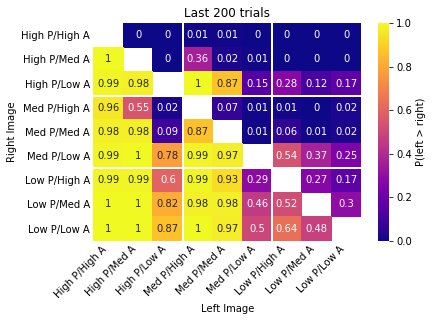

In [303]:
conf_mat = bhv.plotConfusions(master, compare='lr')

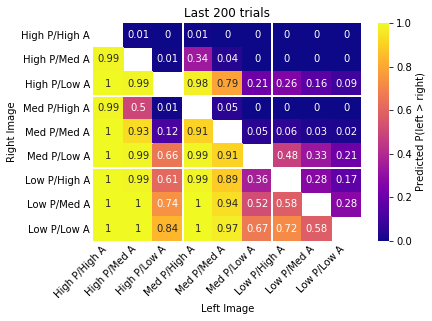

In [526]:
_ = bhv.plotConfusions(master, compare='lr_model', model='prospect')

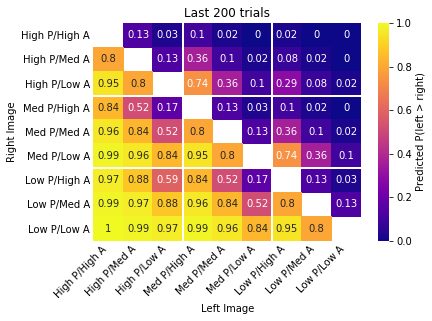

In [280]:
_ = bhv.plotConfusions(master, compare='lr_model', model='dv_lin')

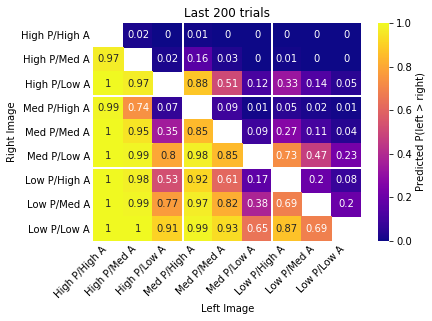

In [279]:
_ = bhv.plotConfusions(master, compare='lr_model', model='dv_exp')

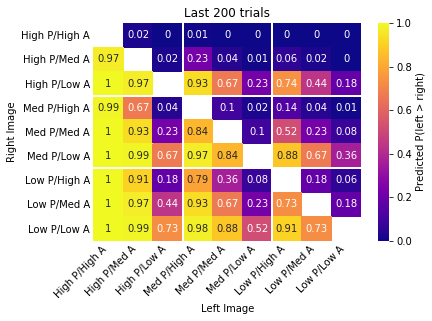

In [524]:
_ = bhv.plotConfusions(master, compare='lr_model', model='dv_hyp')

/Users/nate/Desktop/Rotations/Wallis/behav_analyzer.py:171: RuntimeWarning: invalid value encountered in true_divide
  conf_mat = np.divide(conf_mat,n)


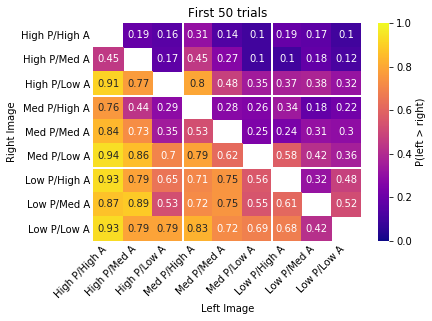

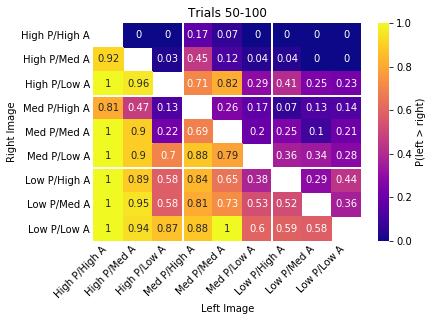

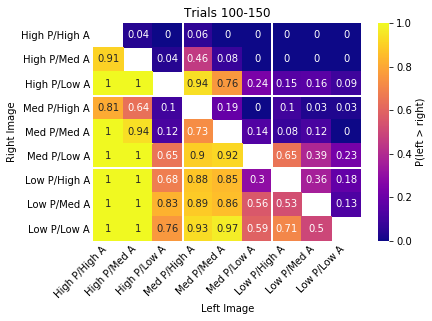

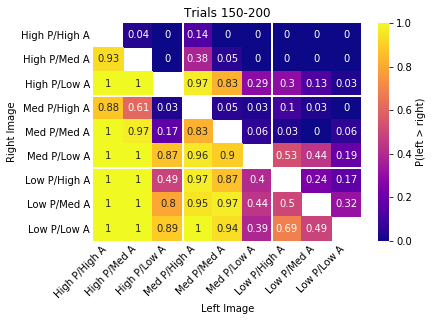

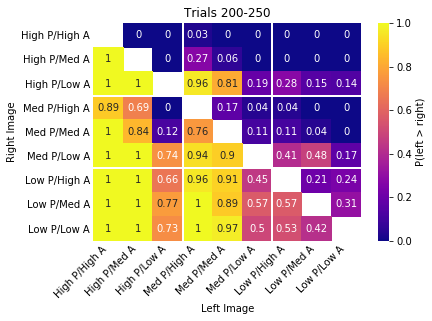

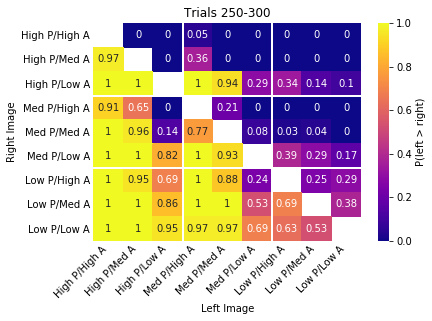

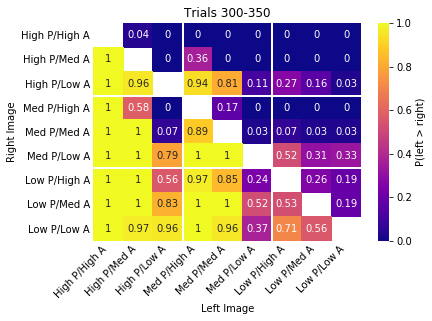

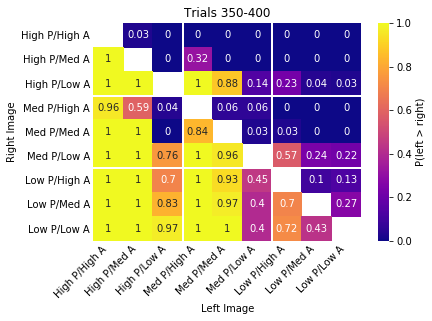

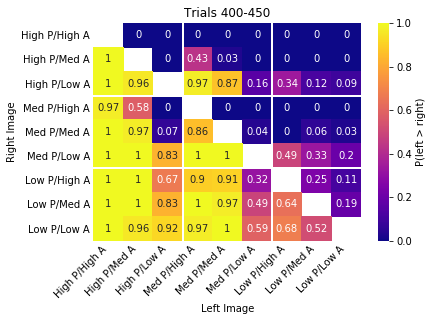

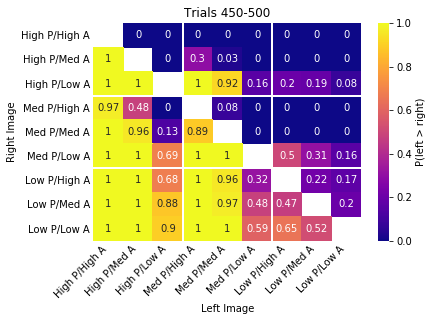

In [34]:
for ii in range(0,500,50):
    plt.figure()
    _ = bhv.plotConfusions(master, compare='lr', win_size=50, start=ii, end='front')

/Users/nate/Desktop/Rotations/Wallis/bhv_analysis.py:193: RuntimeWarning: invalid value encountered in true_divide
  if compare in ['ab','lr']:


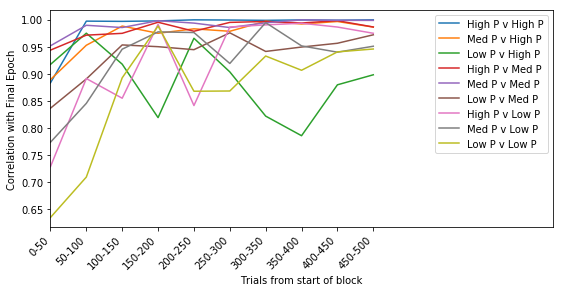

In [288]:
plt.figure(figsize=(9,4))
_,_ = bhv.plotChoiceEvolution(master, by='prob')

/Users/nate/Desktop/Rotations/Wallis/bhv_analysis.py:193: RuntimeWarning: invalid value encountered in true_divide
  if compare in ['ab','lr']:


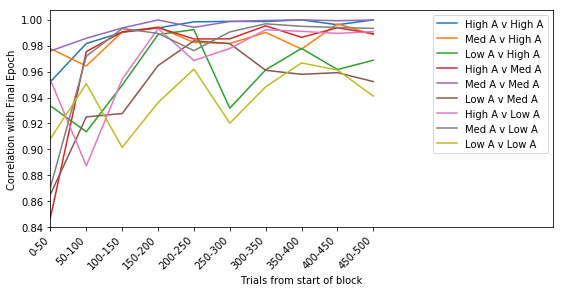

In [289]:
plt.figure(figsize=(9,4))
_,_ = bhv.plotChoiceEvolution(master, by='amnt')

In [ ]:
_, _ = bhv.plotChoiceEvolution(master)

/Users/nate/Desktop/Rotations/Wallis/behav_analyzer.py:171: RuntimeWarning: invalid value encountered in true_divide
  conf_mat = np.divide(conf_mat,n)


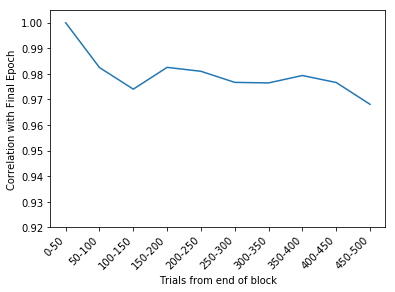

In [42]:
_,_ = bhv.plotChoiceEvolution(master, sesstype='ABA', end='back')

In [10]:
data = master[bhv.isvalid(master,sets='new')]

In [39]:
test_data = data[data['date']==dates[-1]].tail(200)
test_data = test_data.replace({'lever': {1: 0}}).replace({'lever': {-1: 1}})

In [31]:
groups = ['left_prob_level','left_amnt_level','right_prob_level','right_amnt_level']
pl_byoptions = test_data.groupby(groups).mean()

In [663]:
dv_exp_res, dv_exp_aic = model.fitSubjValues(master, model='dv_exp')
print('AIC:', dv_exp_aic)

AIC: 836.0739098061697


In [661]:
dv_hyp_res, dv_hyp_aic = model.fitSubjValues(master, model='dv_hyp')
print('AIC:', dv_hyp_aic)

AIC: 1691.3306599454652


In [659]:
dv_lin_res, dv_lin_aic = model.fitSubjValues(master, model='dv_lin')
print('AIC:', dv_lin_aic)

AIC: 1698.9390938063707


In [660]:
prospect_res, prospect_aic = model.fitSubjValues(master, model='prospect', split_sess=True)
print('AIC:', np.sum(prospect_aic))

AIC: 2996.542593506676


In [654]:
prospect_res

left_prob_level  \
left_prob_level left_amnt_level right_prob_level right_amnt_level                    
1.0             1.0             1.0              2.0                           1.0   
                                                 3.0                           1.0   
                                2.0              1.0                           1.0   
                                                 2.0                           1.0   
                                                 3.0                           1.0   
                                3.0              1.0                           1.0   
                                                 2.0                           1.0   
                                                 3.0                           1.0   
                2.0             1.0              1.0                           1.0   
                                                 3.0                           1.0   
                                2.0              1.0                           1.0   
                                                 2.0                           1.0   
                                                 3.0                           1.0   
                                3.0              1.0                           1.0   
                                                 2.0                           1.0   
                                                 3.0                           1.0   
                3.0             1.0              1.0                           1.0   
                                                 2.0                           1.0   
                                2.0              1.0                           1.0   
                                                 2.0                           1.0   
                                                 3.0                           1.0   
                                3.0              1.0                           1.0   
                                                 2.0                           1.0   
                                                 3.0                           1.0   
2.0             1.0             1.0              1.0                           2.0   
                                                 2.0                           2.0   
                                                 3.0                           2.0   
                                2.0              2.0                           2.0   
                                                 3.0                           2.0   
                                3.0              1.0                           2.0   
...                                                                            ...   
                3.0             1.0              3.0                           2.0   
                                2.0              1.0                           2.0   
                                                 2.0                           2.0   
                                3.0              1.0                           2.0   
                                                 2.0                           2.0   
                                                 3.0                           2.0   
3.0             1.0             1.0              1.0                           3.0   
                                                 2.0                           3.0   
                                                 3.0                           3.0   
                                2.0              1.0                           3.0   
                                                 2.0                           3.0   
                                                 3.0                           3.0   
                                3.0              2.0                           3.0   
                                                 3.0                           3.0   
                2.0      

In [658]:
summary = prospect_res.groupby('date')[['alpha','gamma','delta','w2','w3']].mean()
summary.insert(len(summary.columns),'AIC',aic)

summary

,alpha,gamma,delta,w2,w3,AIC
date,,,,,,
2019-08-01,0.827669,0.692596,0.487834,-57.815680,0.760740,63.617524
2019-08-02,2.577269,16.785831,306.762763,-651.151807,0.012355,55.595177
2019-08-06,0.476335,0.258817,0.003417,-4448.625049,0.330381,76.677191
2019-08-07,0.794103,8.243398,59.265749,-15.504855,-0.237745,79.188633
2019-08-08,0.549214,1.133126,2.455628,-30.936132,0.702935,41.343884
2019-08-09,1.091534,0.823944,0.207350,-81.508424,0.440867,76.147469
2019-08-11,4.893999,33.688907,76922.684201,-125461.357382,-0.389146,49.474545
2019-08-12,1.689507,9.300463,29.904712,-50.015862,-0.137500,82.097883
2019-08-14,1.407788,8.588530,68.144715,-31.344162,0.184582,74.169402


In [612]:
ev_res, aic = model.fitSubjValues(master, model='ev', split_sess=True)
print('AIC:', np.sum(aic))

AIC: 2977.579806250695


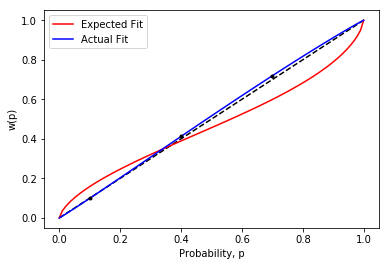

In [560]:
alpha = prospect_res['gamma'][0]
delta = prospect_res['delta'][0]

delta_fake = .84
gamma_fake = .68

p = np.linspace(0,1,100)
w_fake = (delta_fake*(p**gamma_fake)) / (delta_fake*(p**gamma_fake) + (1-p)**gamma_fake)
w = (delta*(p**gamma)) / (delta*(p**gamma) + (1-p)**gamma)

samps = np.array([.1,.4,.7])
w_samps = (delta*(samps**gamma)) / (delta*(samps**gamma) + (1-samps)**gamma)

plt.plot([0,1],[0,1],'--k')
fake, = plt.plot(p,w_fake,'-r')
real, = plt.plot(p,w,'b')
plt.plot(samps,w_samps,'.k')

plt.xlabel('Probability, p')
plt.ylabel('w(p)')
plt.legend((fake,real),('Expected Fit','Actual Fit'))

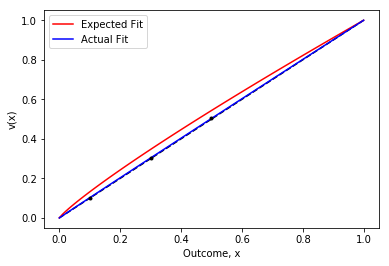

In [561]:
alpha = prospect_res['alpha'][0]
alpha_fake = .88

x = np.linspace(0,1,100)
v_fake = x**alpha_fake
v_samps = np.array([.1,.3,.5])**alpha
v = x**alpha
plt.plot([0,1],[0,1],'--k')
fake, = plt.plot(x,v_fake,'-r')
real, = plt.plot(x,v,'b')
plt.plot(np.array([.1,.3,.5]),v_samps,'.k')

plt.xlabel('Outcome, x')
plt.ylabel('v(x)')
plt.legend((fake,real),('Expected Fit','Actual Fit'))

In [308]:
test = np.arange(81).reshape((9,9))
test

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [331]:
test.reshape((3,3,3,3)).reshape((9,9))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [348]:
x = np.array([.1,.1,.5])
p = np.array([.1,.7,.7])

In [364]:
stats.binom.logpmf(5,10,.5)+stats.binom.logpmf(5,10,.5)

-2.8040854361760577

In [366]:
stats.binom.logpmf(10,10,.5)+stats.binom.logpmf(0,10,.5)

-13.862943611198906

In [365]:
stats.binom.logpmf(10,20,.5)

-1.7361522965964529